# Сжатие изображений

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

MAX_RANK = 100
FNAME = 'Albert_Einstein_Head.jpg'

image = Image.open(FNAME).convert("L")
img_mat = np.asarray(image)

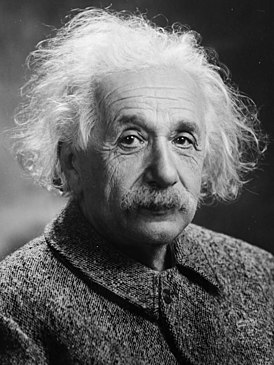

In [13]:
image

In [14]:
img_mat

array([[ 60,  60,  61, ...,  24,  25,  25],
       [ 62,  62,  62, ...,  24,  25,  25],
       [ 64,  64,  64, ...,  24,  25,  25],
       ...,
       [ 28,  11,  19, ..., 136,  59,  76],
       [ 21,  20,  43, ...,  70,  65,  56],
       [  8,  14,  36, ...,  77,  69,  55]], dtype=uint8)

In [15]:
init_size = img_mat.shape[0] * img_mat.shape[1]

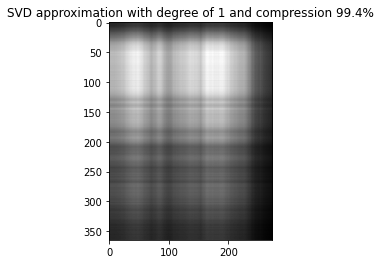

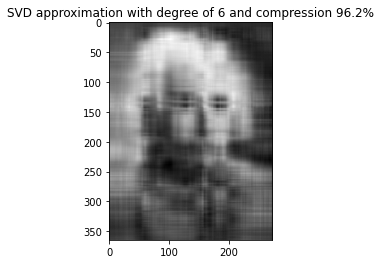

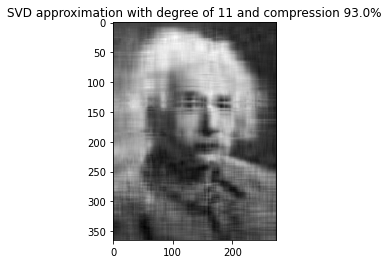

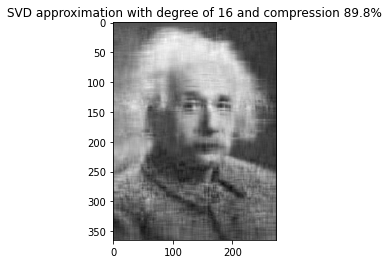

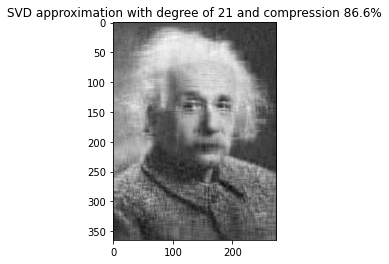

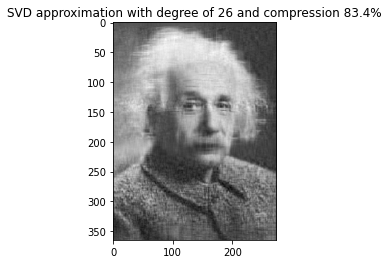

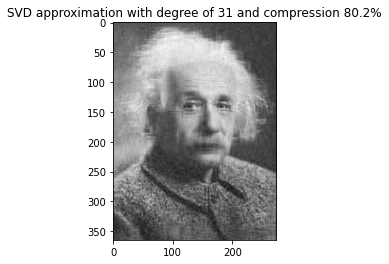

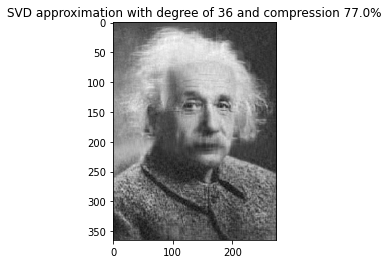

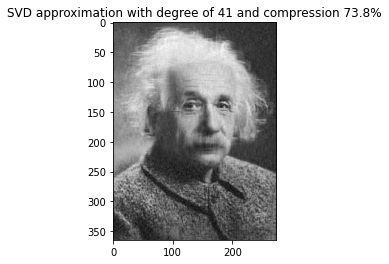

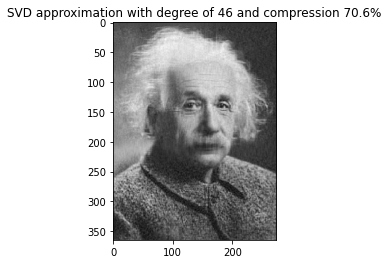

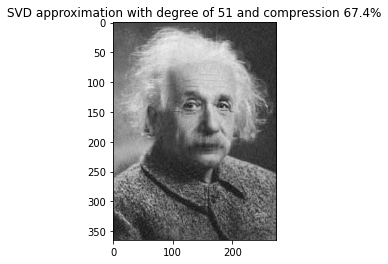

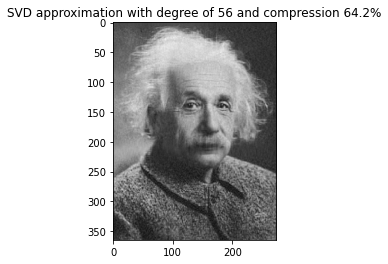

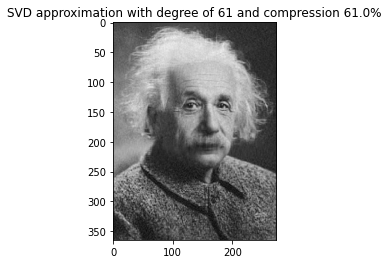

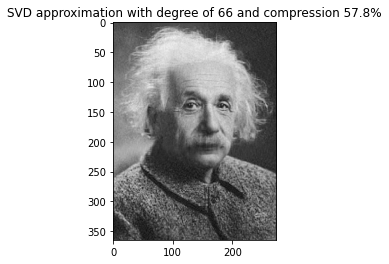

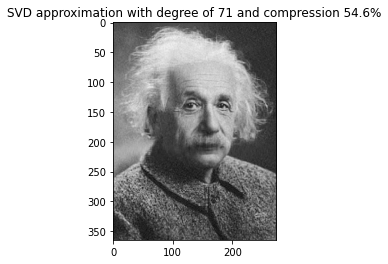

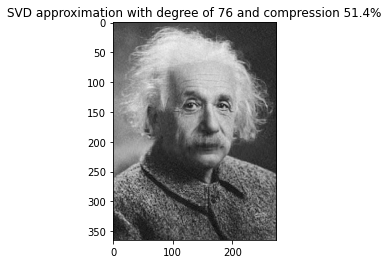

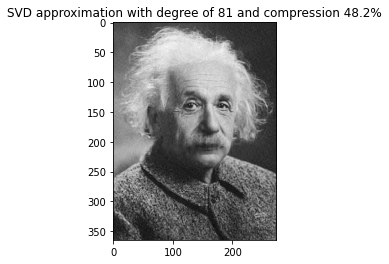

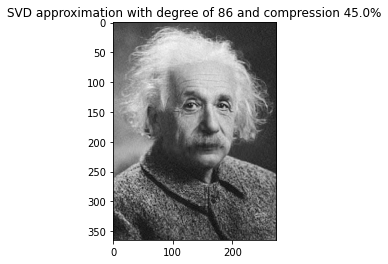

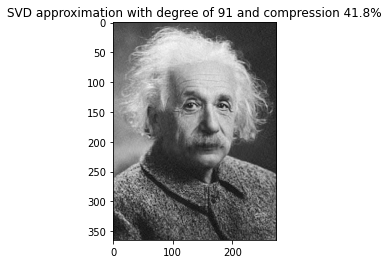

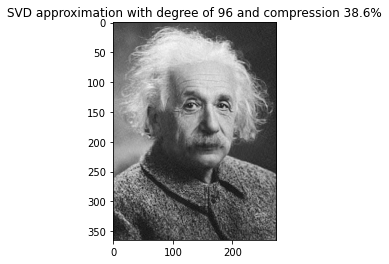

<Figure size 432x288 with 0 Axes>

In [16]:
U, s, V = np.linalg.svd(img_mat, full_matrices=True)
s = np.diag(s)

for k in range(1, MAX_RANK + 1, 5):
  approx = U[:, :k] @ s[0:k, :k] @ V[:k, :]
  compression = np.round((1 - (img_mat.shape[0] * k + k + img_mat.shape[1] * k)/init_size) * 100, 1)
  img = plt.imshow(approx, cmap='gray')
  plt.title(f'SVD approximation with degree of {k} and compression {compression}%')
  plt.plot()
  pause_length = 0.0001 if k < MAX_RANK else 5
  plt.pause(pause_length)
  plt.clf()

# Рекомендательная система

In [17]:
import numpy as np
import pandas as pd

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

%matplotlib inline

Ипользуем Movielens-1M dataset

In [18]:
movies = pd.read_csv('movies.gz', index_col='movieid', header=0, encoding='unicode-escape')[['movienm', 'genreid']]
ratings = pd.read_csv('ratings.gz', header=0)

In [19]:
movies.head()

,movienm,genreid
movieid,,
1,Toy Story (1995),"Animation, Children's, Comedy"
2,Jumanji (1995),"Adventure, Children's, Fantasy"
3,Grumpier Old Men (1995),"Comedy, Romance"
4,Waiting to Exhale (1995),"Comedy, Drama"
5,Father of the Bride Part II (1995),Comedy


In [20]:
ratings.head()

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [21]:
print("Всего оценок ", ratings.shape[0])
print("Количество пользователей ", ratings['userid'].nunique())
print("Количество фильмов ", ratings['movieid'].nunique())

Всего оценок  1000209
Количество пользователей  6040
Количество фильмов  3706


Разреженность матрицы пользователь-рейтинг

In [22]:
ratings.shape[0] /  (ratings['userid'].nunique() *  ratings['movieid'].nunique())

0.044683625622312845

Выберем любимые фильмы (чтобы сгенерировать рекомендации на их основе)

In [23]:
movies.loc[movies.movienm.str.contains('blade runner|matrix', flags=2)]

,movienm,genreid
movieid,,
541,Blade Runner (1982),"Film-Noir, Sci-Fi"
2571,"Matrix, The (1999)","Action, Sci-Fi, Thriller"


In [24]:
favorite_movies_ids = [541, 2571] 

In [25]:
# рекомендательная система в 3 строчки кода

# 1) формируем матрицу юзер-рейтинг
data_matrix = csr_matrix((ratings.rating.values.astype('f8'), (ratings.userid.values, ratings.movieid.values)))

# 2) Вычисляем SVD
_, S, Vt = svds(data_matrix, k=50, return_singular_vectors='vh')

# 3) Генерируем top n рекомендаций, на основании любимых фильмов
movies.loc[np.argsort(-Vt.T @ Vt[:, favorite_movies_ids].sum(axis=1))[:15]] 

,movienm,genreid
movieid,,
2571,"Matrix, The (1999)","Action, Sci-Fi, Thriller"
541,Blade Runner (1982),"Film-Noir, Sci-Fi"
589,Terminator 2: Judgment Day (1991),"Action, Sci-Fi, Thriller"
260,Star Wars: Episode IV - A New Hope (1977),"Action, Adventure, Fantasy, Sci-Fi"
1214,Alien (1979),"Action, Horror, Sci-Fi, Thriller"
1240,"Terminator, The (1984)","Action, Sci-Fi, Thriller"
1617,L.A. Confidential (1997),"Crime, Film-Noir, Mystery, Thriller"
1199,Brazil (1985),Sci-Fi
1206,"Clockwork Orange, A (1971)",Sci-Fi


# Principal Component Analysis (PCA)

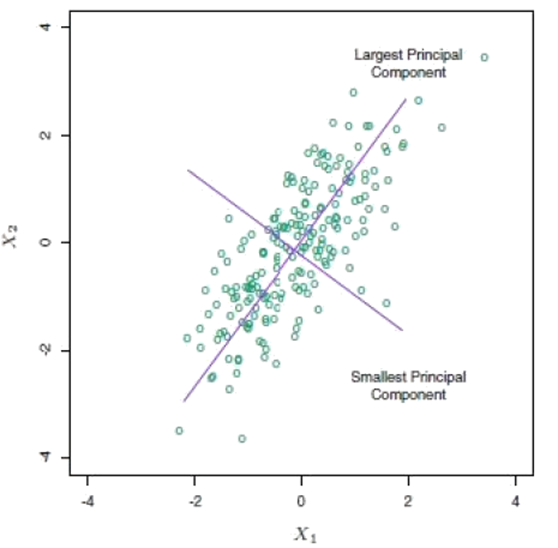

C:\Users\123\AppData\Local\Temp\ipykernel_19196\694994598.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


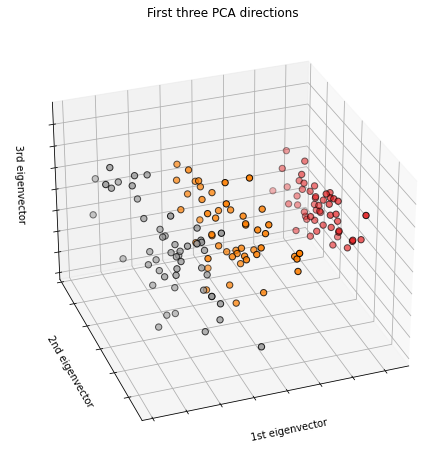

In [26]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

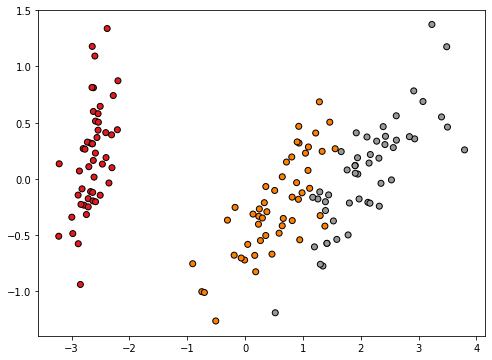

In [27]:
fig = plt.figure(1, figsize=(8, 6))
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

plt.show()

In [28]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])